# Capstone Project by Niklas

## Problem description & Background

Vehicle accidents can have tremendous impacts on a person's life - both from a health perspective but also on a financial one.
On those, multiple factors like traffic, rain, snow, wind,
or road conditions can determine the likeliness and severity of an accident.

*Can it be possible to determine and quantify the risk even before starting the engine by knowing certain conditions that can be expected during the ride?*

So, the goal of this research is to help people to evaluate the overall risk of a vehicle trip out of the combination of likeliness
of an accident and potential impact/severity, so that drivers can make better decisions for themselves and other people.

## Data description and usage to solve the problem

For this Capstone Project, a Collision data set will be used that includes information about almost 200,000 accidents recorded in Seattle, WA, since the year 2004.
From those accidents, 5085 did not involve vehicles but just pedestrians and cyclists. Those will be excluded from the analysis.
Overall, the data set contains various variables with possible influence on the target variable, the **SEVERITY** of an accident.
These predictor variables include the following:

- *WEATHER:* Describing weather conditions with attribute options like Clear, Overcast, Raining, Fog, Crosswind, Snow, and other
- *ROADCOND:* Describing road conditions with attribute options like Dry, Wet, Ice, Oil, Standing Water, and other
- *LIGHTCOND:* Describing light conditions with attribute options like Daylight, Dawn, and Dark with different status of artificial/street light
- *ADDRTYPE:* Describing the address type where a collision took place with the options Alley, Block, and Intersection

Going forward, this data will be examined via exploratory analysis to identify the most influential predictor variables.


## Methodology section

## 1 Exploratory Analysis

Import the pandas library

In [162]:
import pandas as pd

Import the data set containing car collisions from Seattle, Washington.

In [163]:
df_raw = pd.read_csv("Data-Collisions.csv")

Clean the data & copy to new dataframe

In [164]:
df_columns = df_raw[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']]
df_cleaned = df_columns.copy()
df_cleaned.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

Delete the rows with missing, "Unknown" or "Other" data

In [165]:
df_cleaned.dropna(inplace=True)

df_cleaned["ADDRTYPE"] = df_cleaned["ADDRTYPE"].astype('category')
df_cleaned["WEATHER"] = df_cleaned["WEATHER"].astype('category')
df_cleaned["ROADCOND"] = df_cleaned["ROADCOND"].astype('category')
df_cleaned["LIGHTCOND"] = df_cleaned["LIGHTCOND"].astype('category')

#### 1.1 Analysis of potential dangerous spots for accidents

Count the values of where the car collisions took place.

In [166]:
df_cleaned["ADDRTYPE"].value_counts()

Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

The data illustrates that almost 70% of all recorded collisions where recorded in blocks, whereas intersections make up about 30%. Alley collisions are quite rare with under 1% of the total count.

Count the values of what the weather conditions where when the car collisions took place.

In [167]:
df_cleaned["WEATHER"].value_counts()

Clear                       110499
Raining                      32976
Overcast                     27551
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Mostly, the weather was clear during collisions followed by rain, overcast, and unknown conditions. Snowing, other, and Fog/Smog/Smoke make up another small percentage. Conditions such as Sleet/Hail/Freezing Rain or Blowing Sand/Dirt make up some outliers.

Count the values of what the road conditions where when the car collisions took place.

In [168]:
df_cleaned["ROADCOND"].value_counts()

Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

The road conditions that where recorded show values that on first hand match with the weather recorded. Streets were dry in most cases, followed by wet conditions, unknown conditions and Ice, Snow and Slush.

The last variable represents the light conditions.

In [169]:
df_cleaned["LIGHTCOND"].value_counts()

Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                          5843
Dawn                          2491
Dark - No Street Lights       1526
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

Most collisions (over 50%) where recorded during daylight. This is followed by various darker light conditions such as dark (street lights on), dusk, dawn, and dark without street lights.

##### Transferring labels to numbers

To prepare the data for the Machine Learning algorithm processing, the object values are transformed into numerical ones.

In [170]:
df_cleaned["ADDRTYPE_INT"] = df_cleaned["ADDRTYPE"].cat.codes
df_cleaned["WEATHER_INT"] = df_cleaned["WEATHER"].cat.codes
df_cleaned["ROADCOND_INT"] = df_cleaned["ROADCOND"].cat.codes
df_cleaned["LIGHTCOND_INT"] = df_cleaned["LIGHTCOND"].cat.codes

Display the first 10 lines of the whole dataset.

In [171]:
df_cleaned.head(10)

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_INT,WEATHER_INT,ROADCOND_INT,LIGHTCOND_INT
0,2,Intersection,Overcast,Wet,Daylight,2,4,8,5
1,1,Block,Raining,Wet,Dark - Street Lights On,1,6,8,2
2,1,Block,Overcast,Dry,Daylight,1,4,0,5
3,1,Block,Clear,Dry,Daylight,1,1,0,5
4,2,Intersection,Raining,Wet,Daylight,2,6,8,5
5,1,Intersection,Clear,Dry,Daylight,2,1,0,5
6,1,Intersection,Raining,Wet,Daylight,2,6,8,5
7,2,Intersection,Clear,Dry,Daylight,2,1,0,5
8,1,Block,Clear,Dry,Daylight,1,1,0,5
9,2,Intersection,Clear,Dry,Daylight,2,1,0,5


### 1.2 Ratio Property damage vs. Injury of variable conditions

In order to get a better understanding of conditions leading to either only property damage or even injuries, the variables will be investigated.
As a result, in a table, the percentage of property damage vs. injury is labeled for each individual value of all given attributes.

In the first table, the addresstype is investigated.

In [172]:
addr_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["ADDRTYPE"], margins=True)

addr_prob.index = ["Injury", "Property Damage", "Total Column"]

addr_prob/addr_prob.loc["Total Column"]

ADDRTYPE,Alley,Block,Intersection,All
Injury,0.892183,0.761363,0.568655,0.696664
Property Damage,0.107817,0.238637,0.431345,0.303336
Total Column,1.000000,1.000000,1.000000,1.000000


When analyzing the addresstype, the following observations can be made under consideration of the overall ratio between property damages and injuries (about 70/30):

- Alleys show a strong tendency for injury collisions and only a small amount of property damage collisions
- Blocks show a medium tendency for injury collisions and only a small amount of property damage collisions
- Intersections show a mild tendency for property damage collisions over injury collisions compared to the overall numbers

In [173]:
weather_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["WEATHER"], margins=True)

weather_prob.index = ["Injury", "Property Damage", "Total Column"]

weather_prob/weather_prob.loc["Total Column"]

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,All
Injury,0.734694,0.67673,0.669627,0.855696,0.683678,0.4,0.662179,0.72,0.758929,0.813616,0.943808,0.696664
Property Damage,0.265306,0.32327,0.330373,0.144304,0.316322,0.6,0.337821,0.28,0.241071,0.186384,0.056192,0.303336
Total Column,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000


When analyzing the weather, the following observations can be made under consideration of the overall ratio between property damages and injuries (about 70/30):

- clear weather, fog/smog/smoke, and rain seem to increase the chance of property damage only collisions
- blowing sand/dirt, severe crosswinds, and especially sleet/hail/freezing rain, and snowing seem to increase the chance of injury collisions

In [174]:
road_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["ROADCOND"], margins=True)

road_prob.index = ["Injury", "Property Damage", "Total Column"]

road_prob/road_prob.loc["Total Column"]

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,All
Injury,0.677531,0.77368,0.625,0.66129,0.69863,0.833669,0.738739,0.947891,0.667535,0.696664
Property Damage,0.322469,0.22632,0.375,0.33871,0.30137,0.166331,0.261261,0.052109,0.332465,0.303336
Total Column,1.000000,1.00000,1.000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


When analyzing the road conditions, the following observations can be made under consideration of the overall ratio between property damages and injuries (about 70/30):

- dry roads, wet roads, and especially oiled roads increase the chance of property damage collisions
- iced roads, standing water, and especially snow/slush increase the likelihood of injuries

In [175]:
light_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["LIGHTCOND"], margins=True)

light_prob.index = ["Injury", "Property Damage", "Total Column"]

light_prob/light_prob.loc["Total Column"]

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,All
Injury,0.781127,0.733953,0.701053,0.636364,0.669611,0.667181,0.668663,0.770925,0.95325,0.696664
Property Damage,0.218873,0.266047,0.298947,0.363636,0.330389,0.332819,0.331337,0.229075,0.04675,0.303336
Total Column,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


When analyzing the light conditions, the following observations can be made under consideration of the overall ratio between property damages and injuries (about 70/30):

- dark conditions without artificial street lighting seem to increase the chance of injury collisions
- the other conditions do not show specific tendencies

## 1.3 Machine Learning Algorithms

During the Support Vector Machines analysis I detected the algorithm to classify the whole dataset to the value 1 - injuries.
As a reason, the strong ratio from 70/30 (injury/property) in the data set is considered.
Therefore, the set will be resampled first, to then go another iteration with all algorithms.

Import the resample library from sklearn

In [176]:
from sklearn.utils import resample

Resampling the dataset and display the number of 1 and 2 value rows.

In [177]:
df_cleaned_majority = df_cleaned[df_cleaned.SEVERITYCODE==1]
df_cleaned_minority = df_cleaned[df_cleaned.SEVERITYCODE==2]

#Downsample majority class
df_cleaned_majority_new = resample(df_cleaned_majority,
                                        replace=False,
                                        n_samples=56883,
                                        random_state=247)

# Combine minority class with downsampled majority class
df_cleaned_bal = pd.concat([df_cleaned_majority_new, df_cleaned_minority])

# Display new class counts
df_cleaned_bal.SEVERITYCODE.value_counts()

2    56883
1    56883
Name: SEVERITYCODE, dtype: int64

Separating the dataset into the target variable and the predictor variables.

In [178]:
import numpy as np

#split data

y_data = np.asarray(df_cleaned_bal['SEVERITYCODE'])
y_data[0:5]

array([1, 1, 1, 1, 1])

In [179]:
x_data = df_cleaned_bal.drop(['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'], axis=1)
x_data = np.asarray(x_data)
x_data [0:5]

array([[1, 1, 1, 5],
       [1, 1, 0, 2],
       [1, 4, 0, 5],
       [1, 1, 0, 5],
       [1, 1, 0, 5]], dtype=int8)

Normalizing the x_data, so that all variables can be compared.

In [180]:
from sklearn import preprocessing
x_data = preprocessing.StandardScaler().fit(x_data).transform(x_data)
x_data[0:5]

array([[-0.76309234, -0.71804814, -0.41595479,  0.40154026],
       [-0.76309234, -0.71804814, -0.69074915, -1.43161546],
       [-0.76309234,  0.40044425, -0.69074915,  0.40154026],
       [-0.76309234, -0.71804814, -0.69074915,  0.40154026],
       [-0.76309234, -0.71804814, -0.69074915,  0.40154026]])

Splitting the data into test and train sets. Testsize is set with 25% of the total dataset.

In [181]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

('number of test samples :', 28442)
('number of training samples:', 85324)


### 1.3.1 K - Nearest Neighbours

The first method that is applied is KNN. Iteratively, K=5 was determined to have the highest accuracy.

In [182]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

#Train Model and Predict

neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [183]:
yhat_knn = neigh.predict(x_test)

yhat_knn[0:5]

array([1, 2, 1, 2, 2])

Determining the ideal K value for KNN

In [184]:
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat_knn=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)


    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.54939878, 0.58462837, 0.58578862, 0.58680824, 0.59978201,
       0.58715983, 0.59493003, 0.5764011 , 0.58941003, 0.57573307,
       0.57995218, 0.57949511, 0.5896913 , 0.58870684])

Plot a graph to illustrate the results

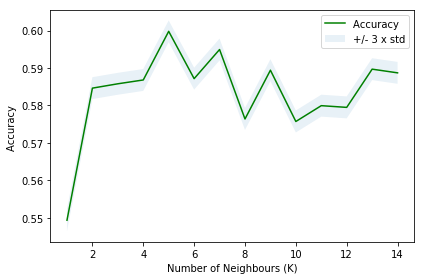

In [185]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

### 1.3.2 Decision tree

The second method that is applied is the Decision Tree.

In [186]:
from sklearn.tree import DecisionTreeClassifier

The max_depth is set with 7 - describing the longest path from the tree's roof to a leaf.

In [187]:
df_cleaned_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
df_cleaned_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [188]:
df_cleaned_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
df_cleaned_predTree = df_cleaned_tree.predict(x_test)

print (df_cleaned_predTree [0:5])
print (y_test [0:5])


[1 2 1 2 2]
[2 2 1 1 2]


### 1.3.3 SVM with poly kernel

The third ML algorithm applied is the SVM with a poly kernel, during test iterations set with a C value of 0.25.

In [190]:
from sklearn import svm
clf = svm.SVC(kernel='poly', C=0.25)
clf.fit(x_train, y_train)

SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [191]:
yhat_svm = clf.predict(x_test)
yhat_svm [0:25]


array([1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2])

### 1.3.4 Logistic Regression

The last ML technique applied to the dataset is the logistic regression model with a C value of 0.025.

In [192]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.025, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.025, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
yhat_LR = LR.predict(x_test)
yhat_LR

array([1, 2, 1, ..., 2, 2, 2])

In [194]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.55463002, 0.44536998],
       [0.43124226, 0.56875774],
       [0.55463002, 0.44536998],
       ...,
       [0.39885953, 0.60114047],
       [0.4089875 , 0.5910125 ],
       [0.30543804, 0.69456196]])

### 1.3.5 Model Evaluation

In the final step, the four ML algorithms are ranked based on two key metrics - the jaccard similarity score and the f1 score. Additionally, for the logistic regression, the log loss is also calculated.

Import the metrics

In [195]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Calculate the metrics for all four methods.

In [196]:
jc_1=jaccard_similarity_score(y_test, yhat_knn)
fs_1=f1_score(y_test, yhat_knn, average='weighted')

jc_2=jaccard_similarity_score(y_test, df_cleaned_predTree)
fs_2=f1_score(y_test, df_cleaned_predTree, average='weighted')

jc_3=jaccard_similarity_score(y_test, yhat_svm)
fs_3=f1_score(y_test, yhat_svm, average='weighted')

jc4=jaccard_similarity_score(y_test, yhat_LR)
fs4=f1_score(y_test, yhat_LR, average='weighted')
ll4=log_loss(y_test, yhat_prob)

list_jc = [jc_1, jc_2, jc_3, jc4]
list_fs = [fs_1, fs_2, fs_3, fs4]
list_ll = ['N/A', 'N/A', 'N/A', ll4]

Create and display a final table, comparing the accuracy metrics for the four applied algorithms.

In [197]:
import pandas as pd

# formulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.588707,0.580611,N/A
Decision Tree,0.605548,0.599037,N/A
SVM,0.605618,0.598745,N/A
Logistic Regression,0.604212,0.598791,0.661124


When analyzing the table, the following observations can be made:

- KNN is the least accurate method
- The Decision Tree has the second best accuracy in terms of jaccard score and f1
- SVM has the highest accuracy for jaccard score but it remains questionable if the trade-off between the needed computing power and the results makes it a worthy solution
- The Linear Regression has almost the same accuracies as the Decision Tree in terms of the metrics

#### Results

Decision Tree and Linear Regression are recommended as the most fitting methods for predicting the severity of a collision.


## Discussion
This report has to be viewed under consideration of several potential weaknesses whose influence could be investigated going further:

- "Other" and "Unknown" values can be filtered out of the dataset for the variables "WEATHER", "ROADCOND", and "LIGHTCOND"
- Other variables could have a strong influence, such as alcohol and tiredness level of the driver
- Only two different severity types were investigated, potentially there are more
- From those investigated, the injuries can also have involved pedestrians or cyclists who where not considered in this research


## Conclusion

Overall, certain conditions increase the likelihood of car collisions that involve people getting injured:

As we have seen, at intersections that danger of a collision resulting in only property damage is the highest in the dataset.
Also, clear weather, fog/smog/smoke, and rain seem to increase the likelihood of only property damage as well as dry, wet, and especially oiled roads.

Other places - alleys and blocks - have a higher risk of injuries.
Also, blowing sand/dirt, severe crosswinds, and especially sleet/hail/freezing rain, and snowing seem to increase the chance of having injuries as a result of an accident.
They are accompagnied by iced roads, standing water, and especially snow/slush who also increase this likelihood.
Finally, dark conditions without artificial lighting seem to result in mostly injury-related collisions.

When trying to forecast the severity of a potential car collision, four Machine Learning algorithms were trained and tested.
From those, the Decision Tree and the Linear Regression are proposed to be used for further predictions.